In [27]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

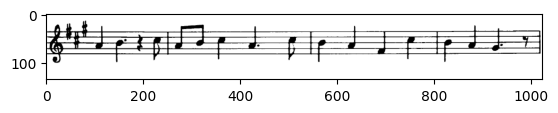

In [ ]:
src = cv.imread(
    '../../image4labs/music.png', cv.IMREAD_COLOR)

# Check if image is loaded fine
if src is None:
    print('Error opening image')

# Show source image
plt.imshow(src)

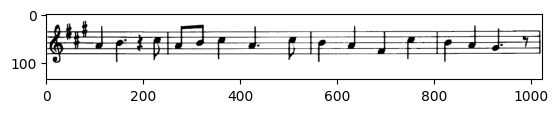

In [7]:
if len(src.shape) != 2:
    gray = cv.cvtColor(src, cv.COLOR_RGB2GRAY)
else:
    gray = src

plt.imshow(gray, cmap="gray")

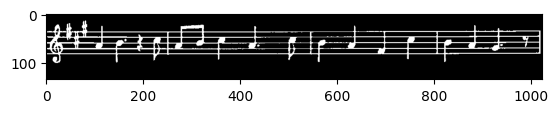

In [24]:
# Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
gray = cv.bitwise_not(gray)
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C,
                          cv.THRESH_BINARY, 13, -2)

plt.imshow(bw, cmap="gray")

In [28]:
horizontal = np.copy(bw)
vertical = np.copy(bw)

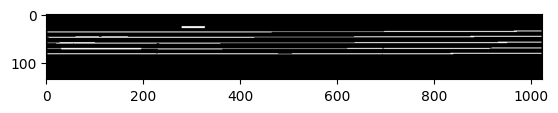

In [30]:
# Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = cols // 30

# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv.getStructuringElement(
    cv.MORPH_RECT, (horizontal_size, 1))

# Apply morphology operations
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)

plt.imshow(horizontal, 'gray')

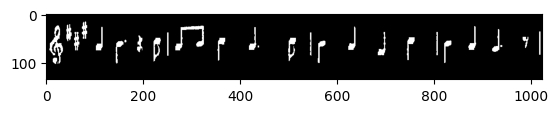

In [32]:
# Specify size on vertical axis
rows = vertical.shape[0]
verticalsize = rows // 30

# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))

# Apply morphology operations
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)

# Show extracted vertical lines
plt.imshow(vertical, 'grey')

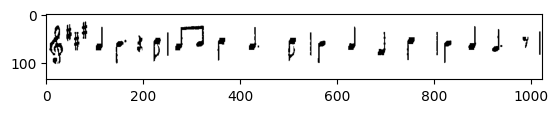

In [35]:
# Inverse vertical image
vertical = cv.bitwise_not(vertical)
plt.imshow(vertical, 'grey')